# Examine CIFTIs

This notebook examines two types of CIFTI files found in the ABCD bids dataset: '*dparc.dlabel.nii' and 'ptseries.nii'. These correspond to atlas labels and participant timeseries, respectively.

Notes

- Atlas images `dparc.nii` can be ignore since parcellated timeseries `ptseries.nii` contains all information need to identify the ROIs. 
- `ptseries.nii` consists of the concatenated timeseries (i.e. run 1 and 2).

Pending questions:
- How can we extract timeseries for cortical areas? Are those ROIs excluded from the `ptseries`?

In [5]:
# Set up packages and working directory
import os
from glob import glob
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import re
import types

def setwd():
    PROJROOT = os.path.join(os.path.abspath(''), '..')
    os.chdir(PROJROOT)
    print(f'Working directory set to {os.getcwd()}')
    return None

setwd()

# Functions for exploration
def get_attributes(obj):
    attributes = [attr_name for attr_name in dir(obj) if not callable(getattr(obj, attr_name)) and not bool(re.search("^_", attr_name))]
    return attributes

def get_methods(obj):
    methods = [method_name for method_name in dir(obj) if callable(getattr(obj, method_name)) and not bool(re.search("^_", method_name))]
    return methods

def print_attrs(obj):
    for attr in get_attributes(obj):
        print(f'{attr}:')
        a = getattr(obj, attr)
        if isinstance(a, types.GeneratorType):
            print(list(a))
        else: 
            print(a)
    return None


Working directory set to /home/vgonzenb/abcd


# Atlas
## Data
Inspecting the data contents of the atlas CIFTI, we see there are two dimensions: the first one is trivial.

In [6]:
atlas_path = 'bidsdata/derivatives/abcd-hcp-pipeline/Power2011FreeSurferSubcortical_dparc.dlabel.nii'
atlas = nib.load(atlas_path)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [7]:
atlas_data = atlas.get_fdata()
atlas_data.shape

(1, 96854)

In [8]:
atlas_data
np.unique(atlas_data)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96.])

In [9]:
print_attrs(atlas_data)

T:
[[10.]
 [17.]
 [11.]
 ...
 [89.]
 [89.]
 [89.]]
base:
None
ctypes:
data:
dtype:
float64
filename:
None
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

flat:
imag:
[[0. 0. 0. ... 0. 0. 0.]]
itemsize:
8
mode:
None
nbytes:
774832
ndim:
2
offset:
None
real:
[[10. 17. 11. ... 89. 89. 89.]]
shape:
(1, 96854)
size:
96854
strides:
(774832, 8)


## Header

There are 2 axis that form part of the header.

In [10]:
label_axis, brain_model_axis = [atlas.header.get_axis(i) for i in range(atlas.ndim)]
print(f'label_axis: {label_axis}')
print(f'brain_model_axis: {brain_model_axis}')

label_axis: <nibabel.cifti2.cifti2_axes.LabelAxis object at 0x7f6d1d7dcd68>
brain_model_axis: <nibabel.cifti2.cifti2_axes.BrainModelAxis object at 0x7f6d1d7dcda0>


### Label Axis

The label axis seems to contain information about the brain regions included in the given atlas.

In [11]:
print_attrs(label_axis)

label:
[{0: ('???', (1.0, 1.0, 1.0, 0.0)), 1: ('', (1.0, 1.0, 1.0, 1.0)), 2: ('a6_Fronto-parietal_task_control9', (0.322, 0.094, 0.0, 1.0)), 3: ('a7_Ventral_attention1', (0.094, 0.302, 0.157, 1.0)), 4: ('a7_Ventral_attention3', (0.329, 0.094, 0.0, 1.0)), 5: ('a7_Ventral_attention4', (0.329, 0.094, 0.0, 1.0)), 6: ('a14_Cingulo-opercular_task_control6', (0.467, 0.275, 0.192, 1.0)), 7: ('a14_Cingulo-opercular_task_control9', (0.859, 0.078, 0.039, 1.0)), 8: ('a26_Unknown_similar_to_Nelson_2010_1', (0.078, 0.392, 0.192, 1.0)), 9: ('a23_Hippocampus', (0.859, 0.231, 0.078, 1.0)), 10: ('a3_Default_mode9', (0.078, 0.702, 0.549, 1.0)), 11: ('UNKNOWN', (0.094, 0.016, 0.094, 1.0)), 12: ('a6_Fronto-parietal_task_control2', (1.0, 0.749, 0.122, 1.0)), 13: ('a6_Fronto-parietal_task_control3', (0.392, 0.0, 0.392, 1.0)), 14: ('a6_Fronto-parietal_task_control4', (0.275, 0.275, 0.275, 1.0)), 15: ('a14_Cingulo-opercular_task_control4', (0.094, 0.392, 0.157, 1.0)), 16: ('a14_Cingulo-opercular_task_control7'

In [12]:
print(f'Methods of label_axis:')
get_methods(label_axis)


Methods of label_axis:


['from_index_mapping', 'get_element', 'to_mapping']

In [13]:
label_axis.get_element(0)

('fs_L-to-fs_LR_node label',
 {0: ('???', (1.0, 1.0, 1.0, 0.0)),
  1: ('', (1.0, 1.0, 1.0, 1.0)),
  2: ('a6_Fronto-parietal_task_control9', (0.322, 0.094, 0.0, 1.0)),
  3: ('a7_Ventral_attention1', (0.094, 0.302, 0.157, 1.0)),
  4: ('a7_Ventral_attention3', (0.329, 0.094, 0.0, 1.0)),
  5: ('a7_Ventral_attention4', (0.329, 0.094, 0.0, 1.0)),
  6: ('a14_Cingulo-opercular_task_control6', (0.467, 0.275, 0.192, 1.0)),
  7: ('a14_Cingulo-opercular_task_control9', (0.859, 0.078, 0.039, 1.0)),
  8: ('a26_Unknown_similar_to_Nelson_2010_1', (0.078, 0.392, 0.192, 1.0)),
  9: ('a23_Hippocampus', (0.859, 0.231, 0.078, 1.0)),
  10: ('a3_Default_mode9', (0.078, 0.702, 0.549, 1.0)),
  11: ('UNKNOWN', (0.094, 0.016, 0.094, 1.0)),
  12: ('a6_Fronto-parietal_task_control2', (1.0, 0.749, 0.122, 1.0)),
  13: ('a6_Fronto-parietal_task_control3', (0.392, 0.0, 0.392, 1.0)),
  14: ('a6_Fronto-parietal_task_control4', (0.275, 0.275, 0.275, 1.0)),
  15: ('a14_Cingulo-opercular_task_control4', (0.094, 0.392, 0.15

### Brain Model Axis

In [14]:
print_attrs(brain_model_axis)

affine:
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
name:
['CIFTI_STRUCTURE_CORTEX_LEFT' 'CIFTI_STRUCTURE_CORTEX_LEFT'
 'CIFTI_STRUCTURE_CORTEX_LEFT' ... 'CIFTI_STRUCTURE_THALAMUS_RIGHT'
 'CIFTI_STRUCTURE_THALAMUS_RIGHT' 'CIFTI_STRUCTURE_THALAMUS_RIGHT']
nvertices:
{'CIFTI_STRUCTURE_CORTEX_LEFT': 32492, 'CIFTI_STRUCTURE_CORTEX_RIGHT': 32492}
size:
96854
surface_mask:
[ True  True  True ... False False False]
vertex:
[ 0  1  2 ... -1 -1 -1]
volume_mask:
[False False False ...  True  True  True]
volume_shape:
(91, 109, 91)
voxel:
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 ...
 [40 58 45]
 [40 59 45]
 [38 55 46]]


In [15]:
get_methods(brain_model_axis)

['from_index_mapping',
 'from_mask',
 'from_surface',
 'get_element',
 'iter_structures',
 'to_cifti_brain_structure_name',
 'to_mapping']

We can see the structures that are parcellated in this atlas:

In [16]:
list(brain_model_axis.iter_structures())


[('CIFTI_STRUCTURE_CORTEX_LEFT',
  slice(0, 32492, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dc278>),
 ('CIFTI_STRUCTURE_CORTEX_RIGHT',
  slice(32492, 64984, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dc080>),
 ('CIFTI_STRUCTURE_ACCUMBENS_LEFT',
  slice(64984, 65119, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dcb00>),
 ('CIFTI_STRUCTURE_ACCUMBENS_RIGHT',
  slice(65119, 65259, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dc400>),
 ('CIFTI_STRUCTURE_AMYGDALA_LEFT',
  slice(65259, 65574, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dc588>),
 ('CIFTI_STRUCTURE_AMYGDALA_RIGHT',
  slice(65574, 65906, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dc320>),
 ('CIFTI_STRUCTURE_BRAIN_STEM',
  slice(65906, 69378, None),
  <nibabel.cifti2.cifti2_axes.BrainModelAxis at 0x7f6d1d7dc3c8>),
 ('CIFTI_STRUCTURE_CAUDATE_LEFT',
  slice(69378, 70106, None),
  <nibabel.cifti2.cifti2_axes.Bra

Scructure tuples consist of:
1. Its name 
2. The voxels that it spans
3. A brain model axis for the structure

And we can inspect the attributes of the structure

In [17]:
print_attrs(list(brain_model_axis.iter_structures())[5][2])

affine:
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
name:
['CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFT

Taking an example

In [18]:
print_attrs(list(brain_model_axis.iter_structures())[5][2])

affine:
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
name:
['CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFTI_STRUCTURE_AMYGDALA_RIGHT' 'CIFTI_STRUCTURE_AMYGDALA_RIGHT'
 'CIFT

Question: what are the differences in attributes between the cortex and subcortical structures mean?

Inspecting structures in all atlases, we see they all contain the same.

In [19]:

def print_structures(atlas_path):
    cii = nib.load(atlas_path)
    uniq = np.unique(cii.get_fdata())
    atlas_name = os.path.basename(atlas_path).replace('_dparc.dlabel.nii', '').replace('FreeSurferSubcortical', '')
    print(f'Atlas {atlas_name} has {len(uniq)} unique values.')
    print(f'Atlas Name: {atlas_name}')
    time_axis, brain_model_axis = [cii.header.get_axis(i) for i in range(cii.ndim)]
    # Get dictionary of ROIs and their (locations?)
    time_axis.get_element(0)
    structures = [struc[0] for struc in brain_model_axis.iter_structures()]
    for struc in structures:
        print(struc.replace('CIFTI_STRUCTURE_', ''))
    return None

for path in glob('bidsdata/derivatives/abcd-hcp-pipeline/**_dparc.dlabel.nii'):
    print_structures(path)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Atlas Power2011 has 96 unique values.
Atlas Name: Power2011
CORTEX_LEFT
CORTEX_RIGHT
ACCUMBENS_LEFT
ACCUMBENS_RIGHT
AMYGDALA_LEFT
AMYGDALA_RIGHT
BRAIN_STEM
CAUDATE_LEFT
CAUDATE_RIGHT
CEREBELLUM_LEFT
CEREBELLUM_RIGHT
DIENCEPHALON_VENTRAL_LEFT
DIENCEPHALON_VENTRAL_RIGHT
HIPPOCAMPUS_LEFT
HIPPOCAMPUS_RIGHT
PALLIDUM_LEFT
PALLIDUM_RIGHT
PUTAMEN_LEFT
PUTAMEN_RIGHT
THALAMUS_LEFT
THALAMUS_RIGHT


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Atlas Yeo2011 has 138 unique values.
Atlas Name: Yeo2011
CORTEX_LEFT
CORTEX_RIGHT
ACCUMBENS_LEFT
ACCUMBENS_RIGHT
AMYGDALA_LEFT
AMYGDALA_RIGHT
BRAIN_STEM
CAUDATE_LEFT
CAUDATE_RIGHT
CEREBELLUM_LEFT
CEREBELLUM_RIGHT
DIENCEPHALON_VENTRAL_LEFT
DIENCEPHALON_VENTRAL_RIGHT
HIPPOCAMPUS_LEFT
HIPPOCAMPUS_RIGHT
PALLIDUM_LEFT
PALLIDUM_RIGHT
PUTAMEN_LEFT
PUTAMEN_RIGHT
THALAMUS_LEFT
THALAMUS_RIGHT


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Atlas HCP2016 has 380 unique values.
Atlas Name: HCP2016
CORTEX_LEFT
CORTEX_RIGHT
ACCUMBENS_LEFT
ACCUMBENS_RIGHT
AMYGDALA_LEFT
AMYGDALA_RIGHT
BRAIN_STEM
CAUDATE_LEFT
CAUDATE_RIGHT
CEREBELLUM_LEFT
CEREBELLUM_RIGHT
DIENCEPHALON_VENTRAL_LEFT
DIENCEPHALON_VENTRAL_RIGHT
HIPPOCAMPUS_LEFT
HIPPOCAMPUS_RIGHT
PALLIDUM_LEFT
PALLIDUM_RIGHT
PUTAMEN_LEFT
PUTAMEN_RIGHT
THALAMUS_LEFT
THALAMUS_RIGHT


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Atlas Gordon2014 has 353 unique values.
Atlas Name: Gordon2014
CORTEX_LEFT
CORTEX_RIGHT
ACCUMBENS_LEFT
ACCUMBENS_RIGHT
AMYGDALA_LEFT
AMYGDALA_RIGHT
BRAIN_STEM
CAUDATE_LEFT
CAUDATE_RIGHT
CEREBELLUM_LEFT
CEREBELLUM_RIGHT
DIENCEPHALON_VENTRAL_LEFT
DIENCEPHALON_VENTRAL_RIGHT
HIPPOCAMPUS_LEFT
HIPPOCAMPUS_RIGHT
PALLIDUM_LEFT
PALLIDUM_RIGHT
PUTAMEN_LEFT
PUTAMEN_RIGHT
THALAMUS_LEFT
THALAMUS_RIGHT


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Atlas Markov2012 has 206 unique values.
Atlas Name: Markov2012
CORTEX_LEFT
CORTEX_RIGHT
ACCUMBENS_LEFT
ACCUMBENS_RIGHT
AMYGDALA_LEFT
AMYGDALA_RIGHT
BRAIN_STEM
CAUDATE_LEFT
CAUDATE_RIGHT
CEREBELLUM_LEFT
CEREBELLUM_RIGHT
DIENCEPHALON_VENTRAL_LEFT
DIENCEPHALON_VENTRAL_RIGHT
HIPPOCAMPUS_LEFT
HIPPOCAMPUS_RIGHT
PALLIDUM_LEFT
PALLIDUM_RIGHT
PUTAMEN_LEFT
PUTAMEN_RIGHT
THALAMUS_LEFT
THALAMUS_RIGHT


# Parcellated Time series (ptseries)

## Data

In [20]:
ptseries_path = 'bidsdata/derivatives/abcd-hcp-pipeline/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_bold_atlas-Power2011FreeSurferSubcortical_desc-filtered_timeseries.ptseries.nii'
ptseries = nib.load(ptseries_path)

ptseries_data = ptseries.get_fdata()
ptseries_data

memmap([[  5.5014267 ,  -8.54415131,   3.982651  , ...,  -0.56562603,
          28.1163559 ,  -7.75363445],
        [  5.99688339,  -9.69694519,   4.79293251, ...,  -0.90800261,
          29.16954803,  -8.30179691],
        [  6.55827761, -11.11442375,   5.84128046, ...,  -1.39122486,
          29.92878914,  -8.8810215 ],
        ...,
        [ -0.31137699,   0.28211921,  -0.87216747, ...,   0.33416229,
          -0.46271765,  -0.09941883],
        [ -0.25386351,   0.23049451,  -0.71079898, ...,   0.27220827,
          -0.37708527,  -0.08127948],
        [ -0.19941777,   0.18136591,  -0.55818117, ...,   0.21368189,
          -0.2961061 ,  -0.0639878 ]])

In [21]:
get_attributes(ptseries_data)

['T',
 'base',
 'ctypes',
 'data',
 'dtype',
 'filename',
 'flags',
 'flat',
 'imag',
 'itemsize',
 'mode',
 'nbytes',
 'ndim',
 'offset',
 'real',
 'shape',
 'size',
 'strides']

The data has 2 dimensions. Question: which is the time dimension?

In [22]:
ptseries_data.shape

(734, 94)

By checking `dtseries.nii` and one of the BOLD runs we can conclude that the first dimension represents time. 91282 is the number of voxels in the `dtseries.nii` which gets parcellated into 94 ROIs

In [23]:
dtseries = '/home/vgonzenb/abcd/bidsdata/derivatives/abcd-hcp-pipeline/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_bold_desc-filtered_timeseries.dtseries.nii'
print(f'Shape of dtseries image: {nib.load(dtseries).get_fdata().shape}')

Shape of dtseries image: (734, 91282)


In [24]:
bold1='/home/vgonzenb/abcd/bidsdata/derivatives/abcd-hcp-pipeline/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_run-1_space-MNI_bold.nii.gz'
print(f'Shape of BOLD run image: {nib.load(bold1).get_fdata().shape}')

Shape of BOLD run image: (91, 109, 91, 367)


Question: what does the second dimension represent? The second dimension represents ROIs as defined in the atlas(see below for an example `ptseries.nii` with the HPC atlas)

In [25]:
hcp_atlas = 'bidsdata/derivatives/abcd-hcp-pipeline/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_bold_atlas-HCP2016FreeSurferSubcortical_desc-filtered_timeseries.ptseries.nii'
nib.load(hcp_atlas).get_fdata().shape

(734, 379)

First plotting x={1,...,734}, y=0

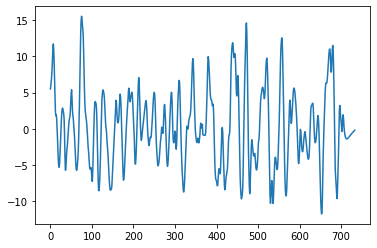

In [26]:
plt.plot(ptseries_data[:,0])

## Header

There are 2 axis that form part of the header.

In [27]:
series_axis, parcel_axis = [ptseries.header.get_axis(i) for i in range(ptseries.ndim)]
print(f'series_axis: {series_axis}')
print(f'parcel_axis: {parcel_axis}')

series_axis: <nibabel.cifti2.cifti2_axes.SeriesAxis object at 0x7f6d1cd50668>
parcel_axis: <nibabel.cifti2.cifti2_axes.ParcelsAxis object at 0x7f6d1cd50358>


### Series Axis

The series axis seems to contain information about the brain regions included in the given ptseries.

In [28]:
print_attrs(series_axis)

size:
734
start:
0.0
step:
0.8
time:
[  0.    0.8   1.6   2.4   3.2   4.    4.8   5.6   6.4   7.2   8.    8.8
   9.6  10.4  11.2  12.   12.8  13.6  14.4  15.2  16.   16.8  17.6  18.4
  19.2  20.   20.8  21.6  22.4  23.2  24.   24.8  25.6  26.4  27.2  28.
  28.8  29.6  30.4  31.2  32.   32.8  33.6  34.4  35.2  36.   36.8  37.6
  38.4  39.2  40.   40.8  41.6  42.4  43.2  44.   44.8  45.6  46.4  47.2
  48.   48.8  49.6  50.4  51.2  52.   52.8  53.6  54.4  55.2  56.   56.8
  57.6  58.4  59.2  60.   60.8  61.6  62.4  63.2  64.   64.8  65.6  66.4
  67.2  68.   68.8  69.6  70.4  71.2  72.   72.8  73.6  74.4  75.2  76.
  76.8  77.6  78.4  79.2  80.   80.8  81.6  82.4  83.2  84.   84.8  85.6
  86.4  87.2  88.   88.8  89.6  90.4  91.2  92.   92.8  93.6  94.4  95.2
  96.   96.8  97.6  98.4  99.2 100.  100.8 101.6 102.4 103.2 104.  104.8
 105.6 106.4 107.2 108.  108.8 109.6 110.4 111.2 112.  112.8 113.6 114.4
 115.2 116.  116.8 117.6 118.4 119.2 120.  120.8 121.6 122.4 123.2 124.
 124.8 125.6 126.

In [29]:
print(f'Methods of series_axis:')
for method in get_methods(series_axis):
    print(method)


Methods of series_axis:
from_index_mapping
get_element
to_mapping


the `get_element()` method pulls an element from the array of time pointers

In [30]:
series_axis.get_element(-1)

586.4

### Parcel Axis

In [31]:
print_attrs(parcel_axis)

affine:
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
name:
['' 'a6_Fronto-parietal_task_control9' 'a7_Ventral_attention1'
 'a7_Ventral_attention3' 'a7_Ventral_attention4'
 'a14_Cingulo-opercular_task_control6'
 'a14_Cingulo-opercular_task_control9'
 'a26_Unknown_similar_to_Nelson_2010_1' 'a23_Hippocampus'
 'a3_Default_mode9' 'UNKNOWN' 'a6_Fronto-parietal_task_control2'
 'a6_Fronto-parietal_task_control3' 'a6_Fronto-parietal_task_control4'
 'a14_Cingulo-opercular_task_control4'
 'a14_Cingulo-opercular_task_control7' 'a16_Mouth_somatosensory-motor'
 'a22_Unknown_with_memory_retrieval_activity3' 'a20_Salience2'
 'a24_Auditory' 'a21_Unknown_medial_temporal_parietl1'
 'a22_Unknown_with_memory_retrieval_activity1'
 'a6_Fronto-parietal_task_control1' 'a20_Salience1' 'a5_Visual'
 'a7_Ventral_attention5' 'a9_Superior_temporal_gyrus1'
 'u10_Inferior_temporal_pole1' 'a14_Cingulo-opercular_task_control8'
 'a15_Dorsal_attention3' 'a3_D

In [32]:
get_methods(parcel_axis)

['from_brain_models', 'from_index_mapping', 'get_element', 'to_mapping']

Let's save important values from this section

In [33]:
roi_dict = {name: i for i, name in enumerate(parcel_axis.name) if name.isupper() and name != 'UNKNOWN'}
roi_dict

{'CEREBELLUM_LEFT': 75,
 'THALAMUS_LEFT': 76,
 'CAUDATE_LEFT': 77,
 'PUTAMEN_LEFT': 78,
 'PALLIDUM_LEFT': 79,
 'BRAIN_STEM': 80,
 'HIPPOCAMPUS_LEFT': 81,
 'AMYGDALA_LEFT': 82,
 'ACCUMBENS_LEFT': 83,
 'DIENCEPHALON_VENTRAL_LEFT': 84,
 'CEREBELLUM_RIGHT': 85,
 'THALAMUS_RIGHT': 86,
 'CAUDATE_RIGHT': 87,
 'PUTAMEN_RIGHT': 88,
 'PALLIDUM_RIGHT': 89,
 'HIPPOCAMPUS_RIGHT': 90,
 'AMYGDALA_RIGHT': 91,
 'ACCUMBENS_RIGHT': 92,
 'DIENCEPHALON_VENTRAL_RIGHT': 93}

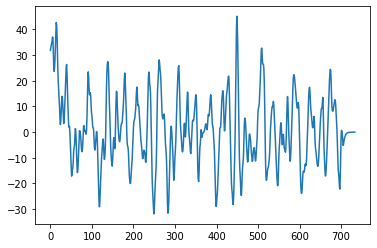

In [34]:
plt.plot(ptseries_data[:, roi_dict['AMYGDALA_LEFT']])

# Event Related Info

Now let's map the timepoints——i.e. t=0, 0.8, ...——to stimuli

In [37]:
series_axis.time[-1]

586.4

In [39]:
events_path = 'bidsdata/sourcedata/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_run-01_bold_EventRelatedInformation.txt'
event_df = pd.read_table(events_path, delimiter='\t', header=1)

onsets = event_df['Stim.OnsetTime'].loc[~event_df['Stim.OnsetTime'].isnull()]
onsets = onsets - min(onsets)
onsets = onsets / 1000

In [68]:
def map2stimuli(t):
    """For timepoint t, return stimuli type based on 2.516 windows"""
    hit = [i for i, x in enumerate(onsets) if x <= t < x + 2.516]
    if hit:
        index = onsets.index[hit.pop()]
        return event_df['StimType'].loc[index]
    else:
        return float('NaN')

def map2block(t):
    """For timepoint t, return block type based on 2.516 windows"""
    hit = [i for i, x in enumerate(onsets) if x <= t < x + 2.516]
    if hit:
        index = onsets.index[hit.pop()]
        return event_df['BlockType'].loc[index]
    else:
        return float('NaN')
    
stim = [map2stimuli(t) for t in series_axis.time]
stim = pd.Series(stim)
block = [map2block(t) for t in series_axis.time]
order = (stim != stim.shift()).mask(stim.isnull()).cumsum()

Difference between stimuli is around 2.515 for back to back blocks

In [106]:
onset_diffs = onsets.rolling(2).apply(lambda x: x[1] - x[0])
onset_diffs

values, counts = np.unique(onset_diffs, return_counts=True)
pd.DataFrame({'values': values, 'count': counts})

plt.hist(onsets.rolling(2).apply(lambda x: x[1] - x[0]), np.arange(0, 61, 2))

/home/vgonzenb/.conda/envs/abcd/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


,values,count
0,2.514,4
1,2.514,4
2,2.514,8
3,2.514,2
4,2.514,1
5,2.514,1
6,2.514,1
7,2.514,37
8,2.515,47
9,2.515,1


In [122]:
# which ara
stim_index_groups = [{stim_type : stim[stim == stim_type].index} for stim_type in stim.unique()]
stim_index_groups

[{'2-Back PosFace': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
               13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
               26,  27,  28,  29,  30,  31, 584, 585, 586, 587, 588, 589, 590,
              591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603,
              604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615],
             dtype='int64')},
 {'NA': Int64Index([ 32,  33,  34,  35,  67,  68,  69,  70,  71,  72,
              ...
              666, 667, 668, 669, 670, 671, 672, 705, 706, 707],
             dtype='int64', length=236)},
 {'0-Back NeutFace': Int64Index([ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
               49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
               62,  63,  64,  65,  66, 673, 674, 675, 676, 677, 678, 679, 680,
              681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693,
              694, 695, 696, 69

In [95]:
def make_roi_df(roi_name, roi_index): 
    return pd.DataFrame({roi_name   : ptseries_data[:, roi_index], 
                        'Stimulus'  : stim, 
                        'Block' : block, 
                        'Order' : order}).groupby(['Stimulus', 'Block', 'Order']).mean().sort_values(by='Order')

pd.concat([make_roi_df(roi_name, roi_index) for roi_name, roi_index in roi_dict.items()], axis=1)
#df = pd.DataFrame({'BOLD': ptseries_data[:,roi_index], 'Stimulus' :stim}).groupby('Stimulus').mean()

,,,CEREBELLUM_LEFT,THALAMUS_LEFT,CAUDATE_LEFT,PUTAMEN_LEFT,PALLIDUM_LEFT,BRAIN_STEM,HIPPOCAMPUS_LEFT,AMYGDALA_LEFT,ACCUMBENS_LEFT,DIENCEPHALON_VENTRAL_LEFT,CEREBELLUM_RIGHT,THALAMUS_RIGHT,CAUDATE_RIGHT,PUTAMEN_RIGHT,PALLIDUM_RIGHT,HIPPOCAMPUS_RIGHT,AMYGDALA_RIGHT,ACCUMBENS_RIGHT,DIENCEPHALON_VENTRAL_RIGHT
Stimulus,Block,Order,,,,,,,,,,,,,,,,,,,
PosFace,2-Back,1.0,3.071459,-1.292313,4.892605,6.521870,-13.427094,4.763988,8.156259,23.714602,-0.092602,9.238358,1.870013,-7.531348,4.300508,2.908728,1.964831,4.397277,5.842288,18.489046,-3.460905
NeutFace,0-Back,2.0,1.484858,-1.056057,0.996859,-2.786982,-1.265913,-2.313565,-3.842263,-0.786906,-3.246992,2.949666,-2.610298,2.157505,1.609457,-3.079566,-5.554940,-2.123664,-3.924386,-3.199689,-1.099140
NegFace,2-Back,3.0,1.192081,2.064631,-5.067684,2.956904,-0.142832,-1.988440,2.762333,-0.328495,-8.042120,-7.779178,3.558382,-5.660439,-6.651146,-2.910573,-3.861739,0.478147,-0.508270,2.813104,-2.591045
PosFace,0-Back,4.0,3.422818,1.453167,-1.184822,2.565681,1.280187,-4.178939,1.013133,1.638358,-0.035955,-3.110703,4.288521,2.705443,-0.294267,4.185900,3.384911,2.896517,7.067500,-3.445930,-0.770186
Place,0-Back,5.0,-4.314524,-4.042534,-1.525096,-3.419527,6.424696,-2.677712,-4.168369,-0.282906,-5.276103,-5.940345,-6.580763,1.520455,2.069324,2.077955,4.074668,2.492005,4.296730,-0.759131,-2.491029
NeutFace,2-Back,6.0,-3.025347,4.214124,-1.053137,6.794692,-4.436689,-2.122498,-2.264905,1.094971,8.732933,-2.961668,-0.568696,-0.460638,0.616069,1.916742,0.822324,-1.799218,-3.263437,3.349435,-0.946173
NegFace,0-Back,7.0,9.140745,-0.880843,-11.716586,-0.450332,0.170799,-3.306551,-4.575361,-7.491837,12.482981,4.205885,10.569606,0.003698,-13.854209,-2.449249,1.980554,-1.011031,-12.792953,-1.260217,-2.153472
Place,2-Back,8.0,-5.770358,-1.682254,-0.008781,2.121509,-3.432054,-5.496659,2.432469,6.593870,-6.622454,-6.267774,-4.619024,-4.060539,1.419575,-3.399885,-2.723100,-0.739419,6.744439,0.495881,-2.775419
NegFace,2-Back,9.0,5.537572,-0.916808,-1.747841,-0.997612,1.228602,-0.745847,0.138414,7.248557,-1.834512,8.384994,5.929117,4.038798,-0.283351,-0.107753,2.569792,2.648585,10.743549,-6.971966,5.795725


There is some heterogeneity across files in their lengths and file lengths and on the 

In [128]:
! find bidsdata/sourcedata/ -name '*.txt' | grep nback | xargs wc -l | cut -d$' ' -f6 | tr ' ' '\n' | uniq
! find bidsdata/sourcedata/ -name '*.txt' | grep nback | xargs head -n1

#! find bidsdata/sourcedata/ -name '*.txt' | grep nback | xargs head -n1

190
220
190
220
190
189
190
220
190
189
220
190
189
190
220
190
220
190
220
190

==> bidsdata/sourcedata/sub-NDARINVR5EL81TR/ses-baselineYear1Arm1/func/sub-NDARINVR5EL81TR_ses-baselineYear1Arm1_task-nback_run-02_bold_EventRelatedInformation.txt <==
E:\Baseline_Data\NDAR_INVR5EL81TR_RAW\Emo_Nback_20160913_v1-R5EL81TR-1.edat2

==> bidsdata/sourcedata/sub-NDARINVR5EL81TR/ses-baselineYear1Arm1/func/sub-NDARINVR5EL81TR_ses-baselineYear1Arm1_task-nback_run-01_bold_EventRelatedInformation.txt <==
$replacement

==> bidsdata/sourcedata/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_run-01_bold_EventRelatedInformation.txt <==
$replacement

==> bidsdata/sourcedata/sub-NDARINVNKNMHEML/ses-baselineYear1Arm1/func/sub-NDARINVNKNMHEML_ses-baselineYear1Arm1_task-nback_run-02_bold_EventRelatedInformation.txt <==
C:\Users\ABCD-UWM Site\Desktop\ABCD\Subjects\NDAR_INVNKNMHEML\Emo_Nback_GE_20160913_v1-NKNMHEML-1.edat2

==> bidsdata/sourcedata/sub-NDARINVN